# Identify variables that impact the target

In [200]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm

In [201]:
df = pd.read_csv('data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              1000 non-null   int64  
 1   Value of House  1000 non-null   float64
 2   TAX             1000 non-null   int64  
 3   LOT SQFT        1000 non-null   int64  
 4   YR BUILT        1000 non-null   int64  
 5   GROSS AREA      1000 non-null   int64  
 6   LIVING AREA     1000 non-null   int64  
 7   FLOORS          1000 non-null   float64
 8   ROOMS           1000 non-null   int64  
 9   BEDROOMS        1000 non-null   int64  
 10  FULL BATH       1000 non-null   int64  
 11  HALF BATH       1000 non-null   int64  
 12  KITCHEN         1000 non-null   int64  
 13  FIREPLACE       1000 non-null   int64  
 14  REMODEL         1000 non-null   object 
dtypes: float64(2), int64(12), object(1)
memory usage: 117.3+ KB


Value of House: Total Value of the house of the house (in $)

TAX: Amount of property tax paid on the house (in $)

LOT SQFT: Size of the lot on which the house was built

YR BUILT: Year of building the house

GROSS AREA: Total area of the house

LIVING AREA: Total living area

FLOORS: Number of floors

ROOMS: Number of rooms

BEDROOMS: Number of bed rooms

FULL BATH: Number of full bath rooms

HALF BATH: Number of half bath rooms

KITCHEN: 1 -> there's a kitchen, 2 -> there's no kitchen  !!

FIREPLACE: Number of fire places

REMODEL: whether there was any remodeling - 3 levels-> No, Old, Recent


In [202]:
df['KITCHEN'].value_counts()

,count
KITCHEN,
1,985
2,15


>> Considering 2 -> there's no kitchen and 1 -> there's kitchen.

In [203]:
df['REMODEL'].value_counts()

,count
REMODEL,
No,737
Recent,152
Old,111


>> If you want to convert the categories of REMODEL variable here itself, which I'm NOT doing in this exercise.

In [204]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
ex = df.copy()
ex['REMODEL'] = le.fit_transform(ex['REMODEL']).astype('str')
ex['REMODEL'].value_counts()

,count
REMODEL,
0,737
2,152
1,111


> 1. **Carry out EDA to identify if there is any relationship between Value of House and independent variables.**

In [205]:
dff = df.drop(['id','REMODEL', 'KITCHEN'], axis = 1)  #info about the numeric variables
dff.describe().T

,count,mean,std,min,25%,50%,75%,max
Value of House,1000.0,388.759169,98.851516,177.4,321.00,370.35,437.10,1009.9
TAX,1000.0,4890.096000,1243.555171,2231.0,4038.00,4658.50,5498.00,12704.0
LOT SQFT,1000.0,6176.224000,2700.140088,1237.0,4635.75,5644.50,6856.50,39000.0
YR BUILT,1000.0,1937.437000,25.838414,1845.0,1920.00,1935.00,1955.00,2010.0
GROSS AREA,1000.0,2889.511000,840.570994,821.0,2339.75,2700.00,3224.75,7624.0
LIVING AREA,1000.0,1642.821000,518.067226,576.0,1306.00,1558.00,1867.00,4133.0
FLOORS,1000.0,1.678000,0.441601,1.0,1.00,2.00,2.00,2.5
ROOMS,1000.0,6.993000,1.416671,4.0,6.00,7.00,8.00,14.0
BEDROOMS,1000.0,3.196000,0.849886,1.0,3.00,3.00,4.00,7.0
FULL BATH,1000.0,1.300000,0.523712,1.0,1.00,1.00,2.00,4.0


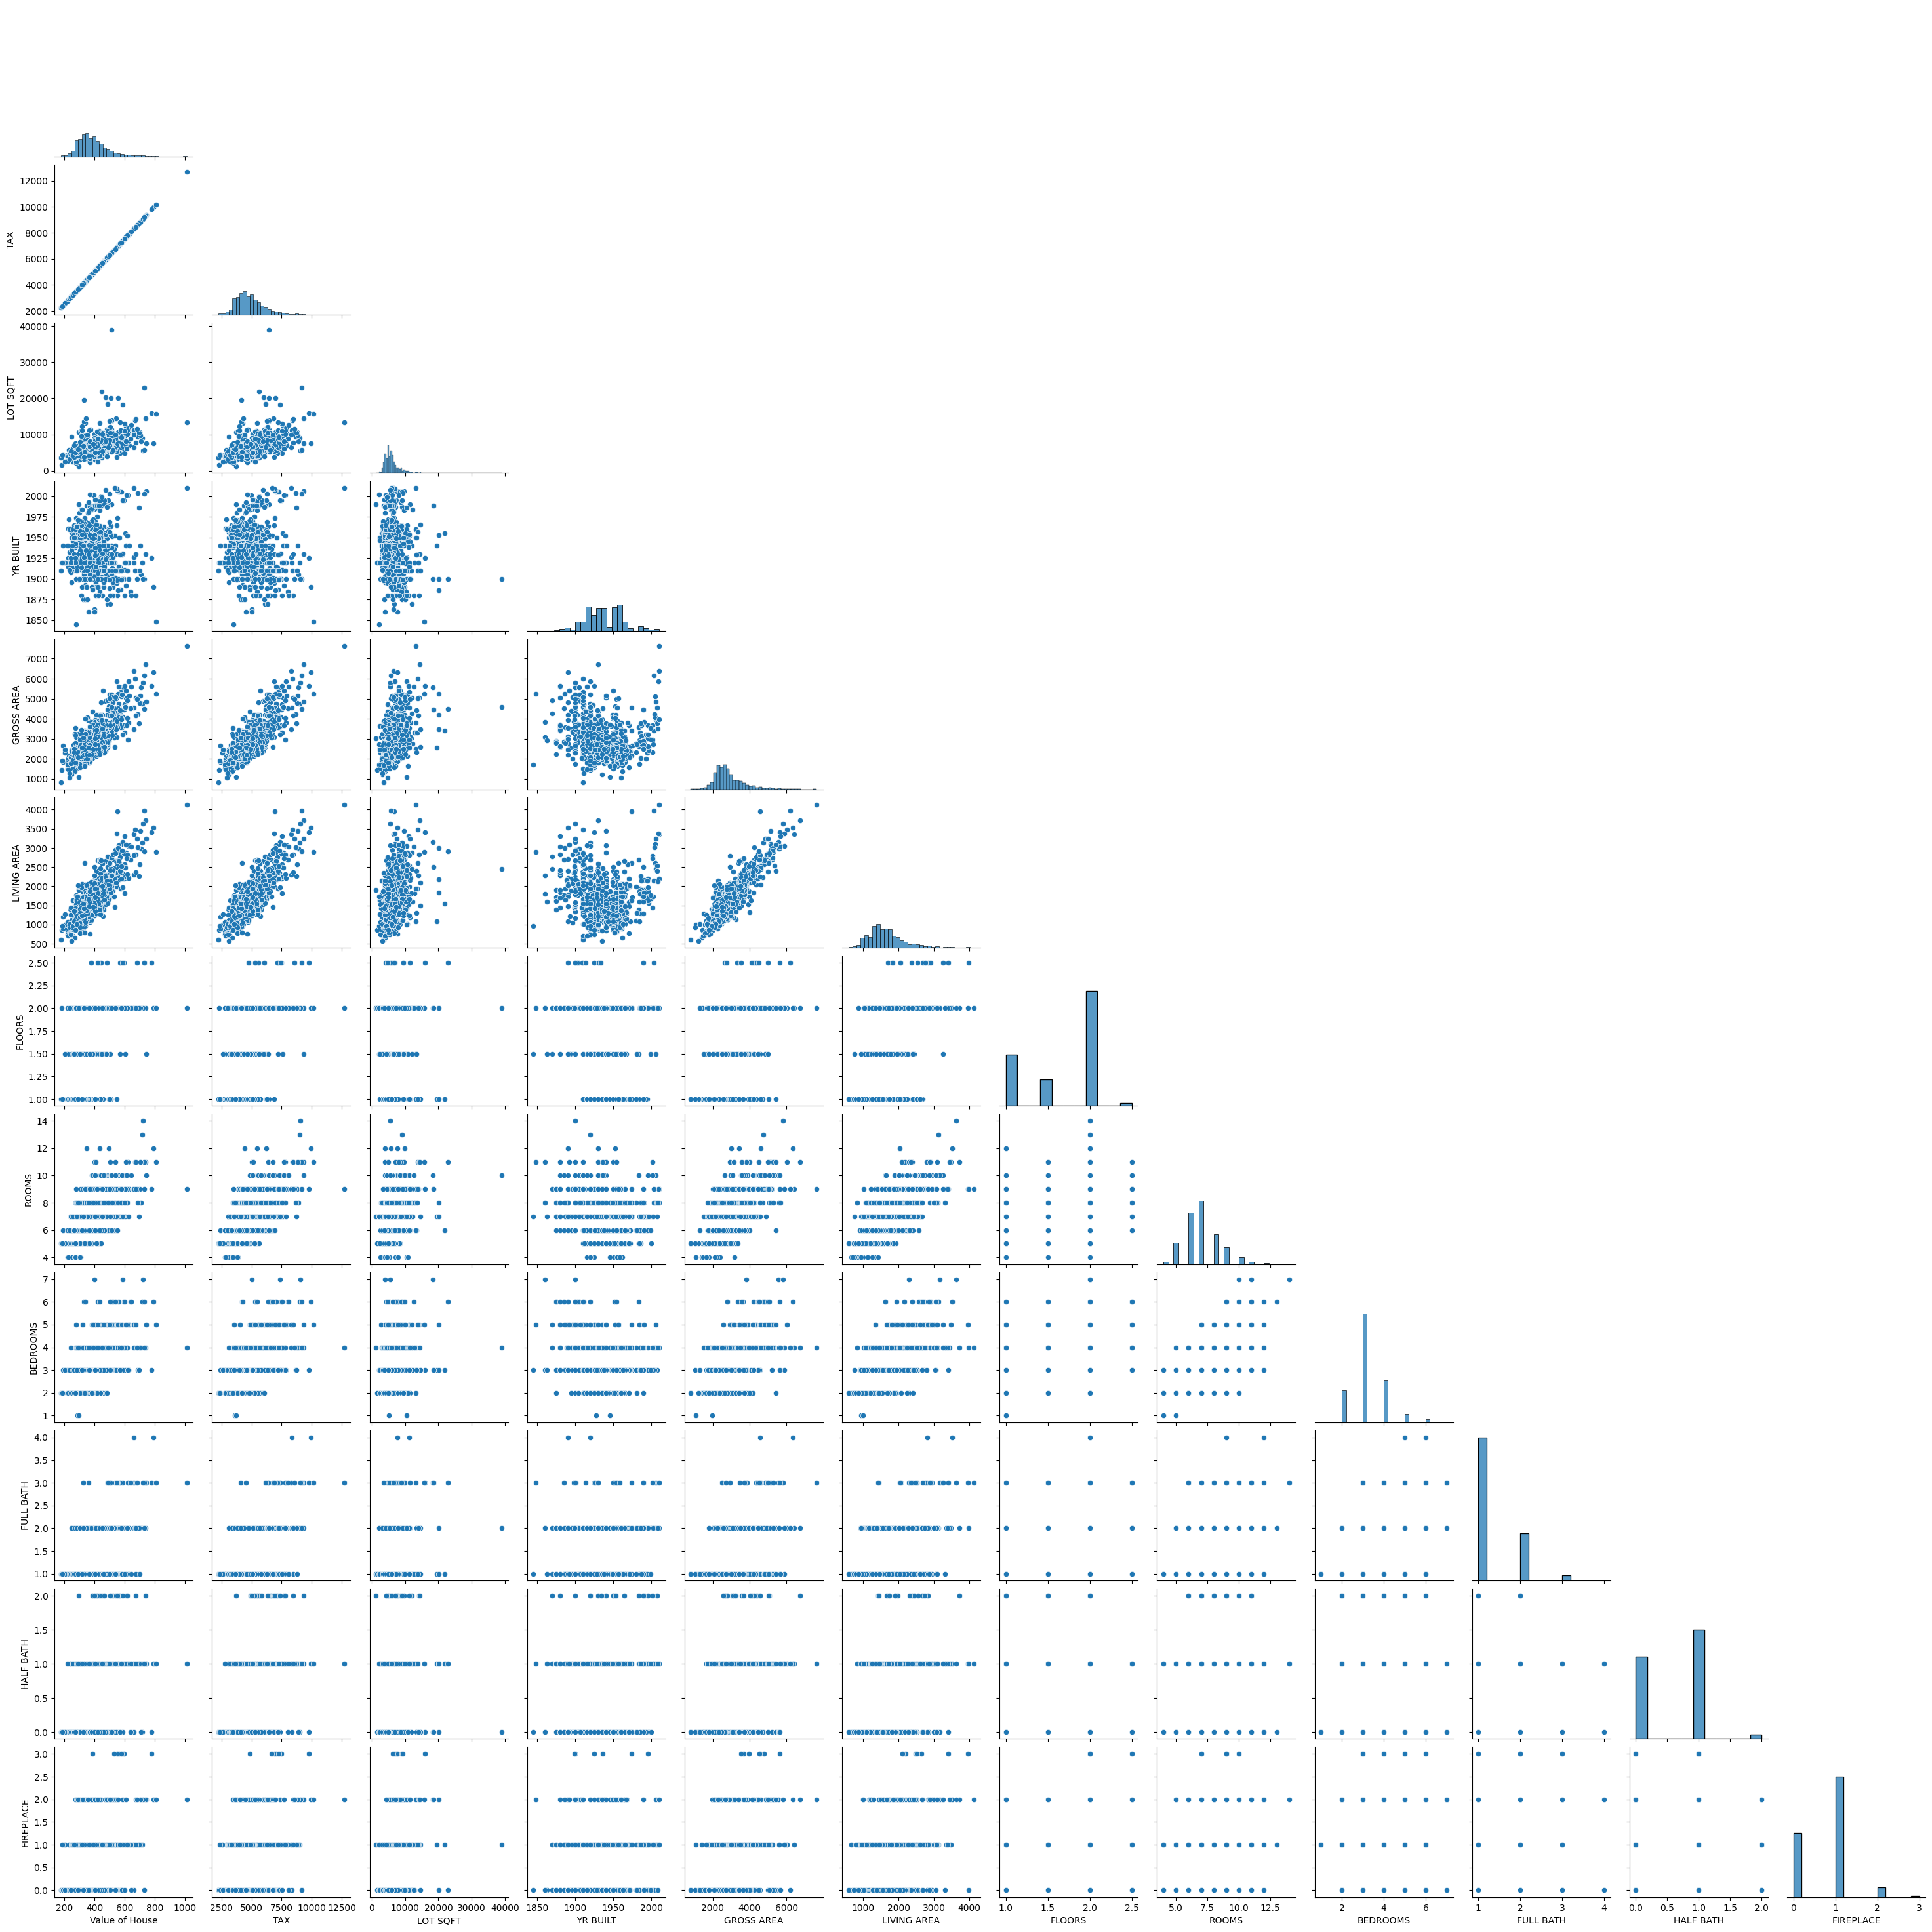

In [206]:
sns.pairplot(dff, corner = True)

<Axes: xlabel='REMODEL', ylabel='Value of House'>

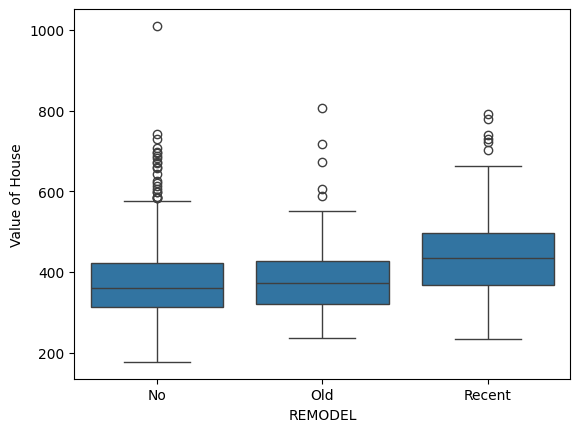

In [207]:
sns.boxplot(x = 'REMODEL', y = 'Value of House', data = df)

<Axes: xlabel='KITCHEN', ylabel='Value of House'>

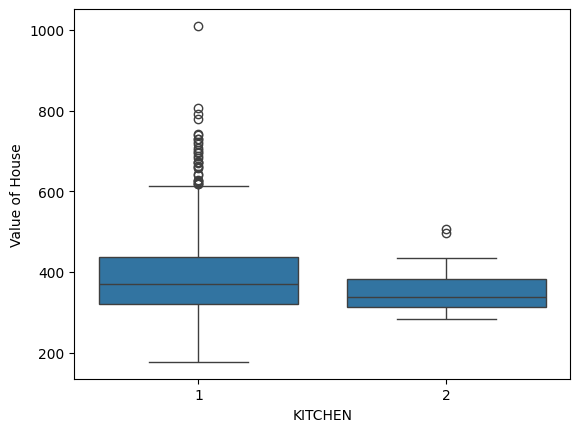

In [208]:
sns.boxplot(x = 'KITCHEN', y = 'Value of House', data = df)

<Axes: >

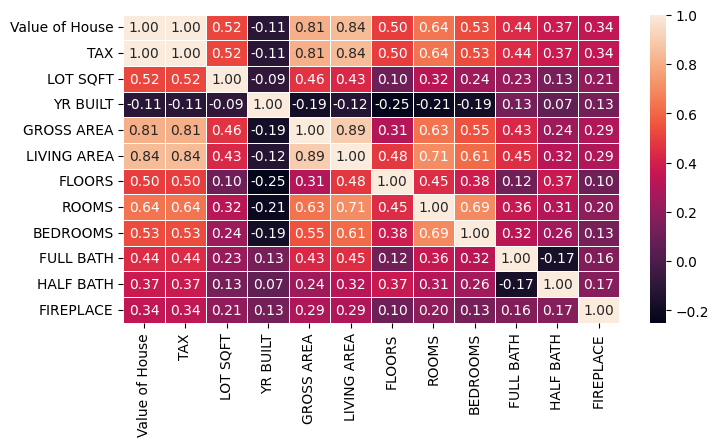

In [209]:
plt.figure(figsize = (8, 4))
sns.heatmap(dff.corr(method = 'pearson'), annot = True, fmt = '.2f', linewidths = 0.5)  #default method

> 2. **Based on the EDA, decide whether the variable TAX should be used as an independent variable. Explain.**

>> TAX is linearly and positively correlated with the value of house.

>> Also, YR BUILT is almost not correlated with the response/target.

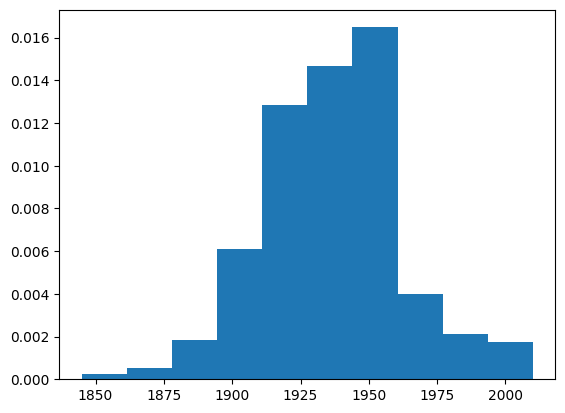

In [217]:
dff['YR BUILT'].hist()
plt.grid(False)

> 3. **Use EDA to identify the need for any interaction variables and create additional variables as required (including dummy variables)**

>> Get the dummy variables for the category

In [210]:
model = pd.get_dummies(df['REMODEL'])
model.head()

,No,Old,Recent
0,True,False,False
1,True,False,False
2,True,False,False
3,True,False,False
4,False,True,False


In [211]:
model = pd.get_dummies(df['REMODEL'], drop_first = True)
df = pd.concat([df, model], axis = 1)

In [212]:
df.drop(['id', 'REMODEL', 'YR BUILT'], axis = 1, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Value of House  1000 non-null   float64
 1   TAX             1000 non-null   int64  
 2   LOT SQFT        1000 non-null   int64  
 3   GROSS AREA      1000 non-null   int64  
 4   LIVING AREA     1000 non-null   int64  
 5   FLOORS          1000 non-null   float64
 6   ROOMS           1000 non-null   int64  
 7   BEDROOMS        1000 non-null   int64  
 8   FULL BATH       1000 non-null   int64  
 9   HALF BATH       1000 non-null   int64  
 10  KITCHEN         1000 non-null   int64  
 11  FIREPLACE       1000 non-null   int64  
 12  Old             1000 non-null   bool   
 13  Recent          1000 non-null   bool   
dtypes: bool(2), float64(2), int64(10)
memory usage: 95.8 KB


>> One of the categories (first) becomes redundant if the other two are known.

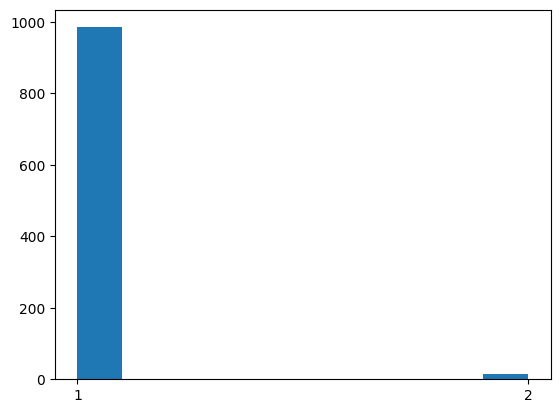

In [219]:
df['KITCHEN'].hist()
plt.xticks([1, 2])
plt.grid(False)

In [220]:
df.drop(['KITCHEN'], axis = 1, inplace = True)

In [221]:
df.head(5)

,Value of House,TAX,LOT SQFT,GROSS AREA,LIVING AREA,FLOORS,ROOMS,BEDROOMS,FULL BATH,HALF BATH,FIREPLACE,Old,Recent
0,287.2,3612,6750,2344,1000,1.0,5,2,1,0,1,False,False
1,360.3,4532,4500,2680,1200,1.0,6,3,1,1,1,False,False
2,413.9,5206,7875,4203,2408,2.0,8,4,2,0,0,False,False
3,330.2,4153,7092,2778,1270,1.0,7,3,1,0,1,False,False
4,380.1,4781,3244,2616,1598,2.0,8,4,2,0,0,True,False


<ipython-input-222-aea44f3ef545>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Value of House'])


<Axes: xlabel='Value of House', ylabel='Density'>

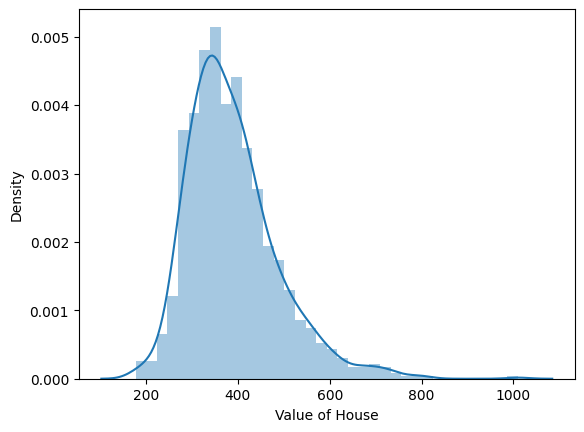

In [222]:
sns.distplot(df['Value of House'])

In [223]:
#df.to_csv('processed_data.csv', index = False)

> Scale changes of the variables only affect the intercepts and not the slopes if there's no multiplicative term like variable interaction

In [224]:
num_vars = ['TAX', 'LOT SQFT', 'GROSS AREA', 'LIVING AREA',
       'FLOORS', 'ROOMS', 'BEDROOMS', 'FULL BATH', 'HALF BATH', 'FIREPLACE']

scaler = MinMaxScaler()
df[num_vars] = scaler.fit_transform(df[num_vars])

In [225]:
df.head(5)

,Value of House,TAX,LOT SQFT,GROSS AREA,LIVING AREA,FLOORS,ROOMS,BEDROOMS,FULL BATH,HALF BATH,FIREPLACE,Old,Recent
0,287.2,0.131863,0.145989,0.223872,0.119202,0.000000,0.1,0.166667,0.000000,0.0,0.333333,False,False
1,360.3,0.219708,0.086407,0.273262,0.175429,0.000000,0.2,0.333333,0.000000,0.5,0.333333,False,False
2,413.9,0.284064,0.175781,0.497134,0.515041,0.666667,0.4,0.500000,0.333333,0.0,0.000000,False,False
3,330.2,0.183520,0.155046,0.287667,0.195108,0.000000,0.3,0.333333,0.000000,0.0,0.333333,False,False
4,380.1,0.243483,0.053147,0.263854,0.287321,0.666667,0.4,0.500000,0.333333,0.0,0.000000,True,False


In [226]:
#df.to_csv('processed_scaled_data.csv', index = False)

In [227]:
X = df.drop('Value of House', axis = 1)  #independent variables

In [228]:
Y = df['Value of House']  #dependent variable

>> Data splitting into train and test subsets

In [229]:
np.random.seed(0)
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 42)

In [238]:
#train = pd.concat([x_train, y_train], axis = 1)
#train.to_csv('train_data.csv', index = False)

#test = pd.concat([x_test, y_test], axis = 1)
#test.to_csv('test_data.csv', index = False)

> 4. **Fit a regression equation with Value of House as the dependent variable.**

In [239]:
x_train = sm.add_constant(x_train)
model = sm.OLS(y_train, x_train.astype(float))
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:         Value of House   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.270e+09
Date:                Sat, 17 May 2025   Prob (F-statistic):               0.00
Time:                        07:38:20   Log-Likelihood:                 1691.5
No. Observations:                 700   AIC:                            -3357.
Df Residuals:                     687   BIC:                            -3298.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         177.3820      0.003   6.17e+04      

In [192]:
#x_test = sm.add_constant(x_test)
#model1 = sm.OLS(y_test, x_test.astype(float))
#results1 = model1.fit()
#print(results1.summary())

> 5. What is the maximum R2 and adjusted R2 possible with all variables in the equation significant at alpha = 0.10?  

In [240]:
#print(results.summary(alpha = 0.10))

In [241]:
results.pvalues

,0
const,0.000000
TAX,0.000000
LOT SQFT,0.995314
GROSS AREA,0.172581
LIVING AREA,0.384739
FLOORS,0.819134
ROOMS,0.000652
BEDROOMS,0.027950
FULL BATH,0.529827
HALF BATH,0.123302


>> Variables with p-value less than 0.05 are statistically significant.

> 6. **What is the impact of remodelling and/or having a fire-place on House Prices?**

>>

> 7. **Is there any multicollinearity?**

In [242]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = X.astype(float)
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
#vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,LIVING AREA,38.367185
2,GROSS AREA,36.670128
0,TAX,28.562667
5,ROOMS,14.446851
6,BEDROOMS,13.356367
1,LOT SQFT,5.949793
4,FLOORS,5.496985
8,HALF BATH,3.390244
9,FIREPLACE,2.906722
7,FULL BATH,2.107451


>> Two or more independent variables are highly correlated.

> 8. Carry out a test for heteroskedasticity.

>> Breusch Pagan Test

>> Presence of heteroskedasticity can be inspected visually too from residual plot.

> 9.** Carry out a test for normality assumption of errors.**

In [243]:
#predictions

x_test = sm.add_constant(x_test)
linreg_y_pred = results.predict(x_test)
residuals = y_test - linreg_y_pred

Text(0, 0.5, 'Predictions')

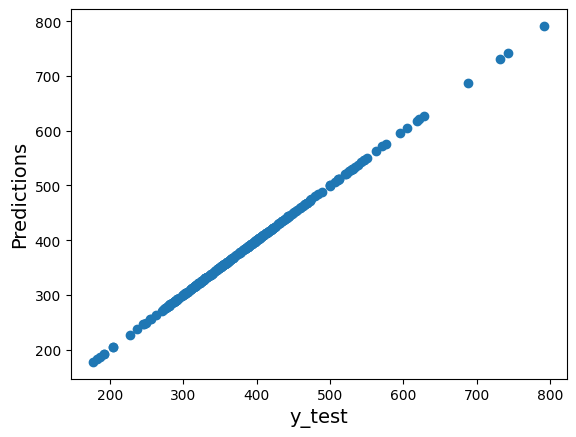

In [244]:
#from sklearn.metrics import r2_score
#r2_score(y_test, linreg_y_pred)

fig = plt.figure()
plt.scatter(y_test, linreg_y_pred)
fig.suptitle('', fontsize = 20)
plt.xlabel('y_test', fontsize = 14)
plt.ylabel('Predictions', fontsize = 14)

<ipython-input-245-ddb48ffce680>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals, bins = 20, kde = True, label = 'Residual plot')


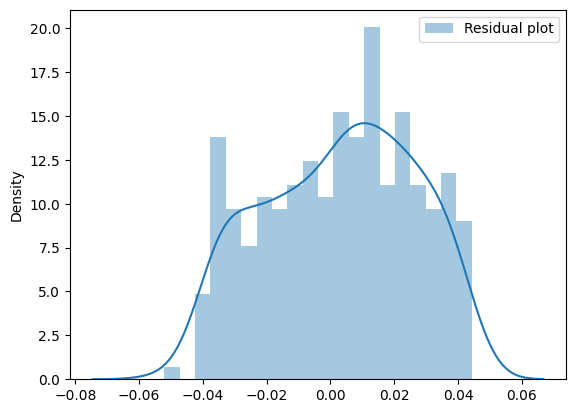

In [245]:
#sns.histplot(residuals, bins = 20, kde = True, alpha = 0.5, label = 'Residual plot')
sns.distplot(residuals, bins = 20, kde = True, label = 'Residual plot')
plt.legend()

Assumptions of linear regression:

>> Errors/residuals are normally distributed

>> They have constant variance across all the independent variables -> homoskedasticity

>> They have unequal variance that is, they change as the independent variable change -> heteroskedasticity 

In [191]:
#linreg_y_pred1 = results1.predict(x_test)
#residuals = y_test - linreg_y_pred1

##sns.histplot(residuals, bins = 20, kde = True, alpha = 0.5, label = 'Residual plot')
#sns.distplot(residuals, bins = 20, kde = True, label = 'Residual plot')
#plt.legend()

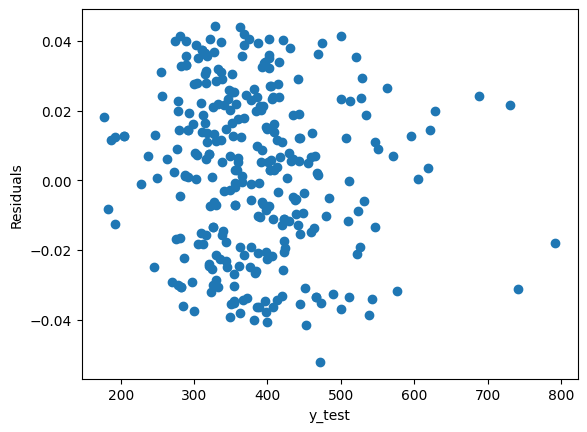

In [246]:
plt.scatter(y_test, residuals)
plt.xlabel('y_test')
plt.ylabel('Residuals')
plt.show()

> 10. **Interpret the regression coefficients.**

In [247]:
#regression coefficients of independent variables

results.params

,0
const,177.381974
TAX,832.505825
LOT SQFT,-0.000079
GROSS AREA,0.022901
LIVING AREA,-0.014607
FLOORS,-0.000863
ROOMS,0.032253
BEDROOMS,-0.018879
FULL BATH,-0.003687
HALF BATH,-0.005839
